In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

In [37]:
df = pd.read_csv('data/experiment2.csv')
df.columns = ["t", "B", "V"]

In [43]:
df = df[500:1400]
df

,t,B,V
1000,10.01,-245.003464,0.006406
1001,10.02,-244.415680,0.005807
1002,10.03,-243.704483,0.005084
1003,10.04,-242.710541,0.004411
1004,10.05,-241.135803,0.003788
...,...,...,...
1495,14.96,953.182678,-0.044081
1496,14.97,971.959595,-0.032589
1497,14.98,987.169922,-0.021218
1498,14.99,998.685425,-0.008833


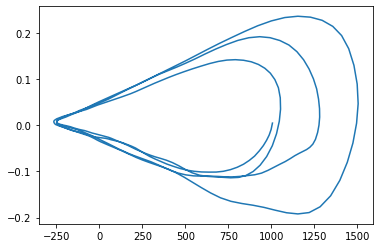

In [44]:
plt.plot(df['B'], df['V'])

In [45]:
x = df['t'].to_numpy()
y = df['B'].to_numpy()

dBdt = [(y[i+1]-y[i-1])/(x[i+1]-x[i-1]) for i in range(1,len(y)-1)]     # central differences for most of the points 
dBdt = np.insert(dBdt,0,y[1]-y[0])/(x[1]-x[0])         # forward difference for first point 
dBdt = np.append(dBdt,y[-1]-y[-2])/(x[-1]-x[-2])    # backward difference for last point

Text(0, 0.5, 'EMF (mV)')

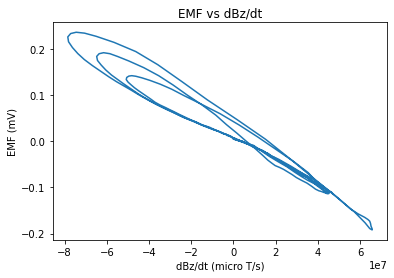

In [70]:
plt.plot(dBdt, df['V'])
plt.title("EMF vs dBz/dt")
plt.xlabel("dBz/dt (micro T/s)")
plt.ylabel("EMF (mV)")

In [76]:
def func_to_fit(dBdt, m):
    return m * dBdt

params, cov = curve_fit(discharge_func_to_fit, df_1a["1a t"], df_1a["1a V"])
std_errs = np.sqrt(np.diag(cov))
print("params" + str(params))
print("std_errs" + str(std_errs))

In [64]:
lr = LinearRegression(fit_intercept=False)
lr.fit(dBdt.reshape(-1, 1), df['V'].to_numpy().reshape(-1, 1))
print("coef = " + str(lr.coef_[0][0]))

coef = -2.5688708438557325e-09


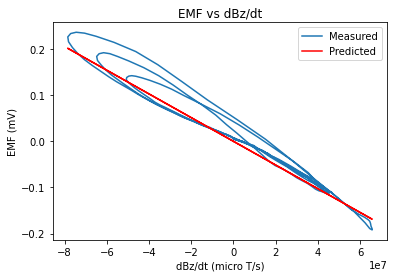

coef = -2.5688708438557325e-09


In [71]:
ypred = lr.predict(dBdt.reshape(-1, 1))
plt.plot(dBdt, df['V'], label="Measured")
plt.plot(dBdt, ypred, label="Predicted", color="r")
plt.title("EMF vs dBz/dt")
plt.xlabel("dBz/dt (micro T/s)")
plt.ylabel("EMF (mV)")
plt.legend()
plt.show()
print("coef = " + str(lr.coef_[0][0]))

In [75]:
N = 32
a = np.pi * (.21/2)**2
N * a

1.108353888186479